# Analisi statistica sul Palio di Siena

In [1]:
import pandas as pd
import re
df = pd.read_excel('estrazione.xlsx', usecols=None, skiprows=0).fillna(value = -1000)
df.columns = ['DataPalio','DataEstrazione','Contrada','Sorteggiata','Estrazione','cd_estrattaDa','Canape','Arrivo','cd_EsitoCorsa','Caduta']
date_list = list(df.DataPalio.apply(str))
df.Canape = df.Canape.astype(int)
anno = []
mese = []
giorno = []
for i in range(len(date_list)):
    s = (re.sub(r'(\d\d\d\d)(\d\d)(\d\d)', r'\1-\2-\3', date_list[i]))
    anno.append(s.split('-')[0])
    mese.append(s.split('-')[1])
    giorno.append(s.split('-')[2])
df.insert(len(df.columns), 'Anno', anno)
df.insert(len(df.columns), 'Mese', mese)
df.insert(len(df.columns), 'Giorno', giorno)
df.head()

,DataPalio,DataEstrazione,Contrada,Sorteggiata,Estrazione,cd_estrattaDa,Canape,Arrivo,cd_EsitoCorsa,Caduta,Anno,Mese,Giorno
0,19000702,19000616.0,Bruco,0,2.0,-1000,7,-1000.0,PS,caduto al secondo San Martino,1900,07,02
1,19000702,19000616.0,Chiocciola,0,3.0,-1000,8,0.0,PP,nessuna caduta,1900,07,02
2,19000702,19000616.0,Civetta,0,5.0,-1000,9,-1000.0,PS,caduto al secondo San Martino,1900,07,02
3,19000702,19000616.0,Drago,1,9.0,LU,2,1.0,VV,nessuna caduta,1900,07,02
4,19000702,19000616.0,Istrice,1,10.0,VA,3,0.0,PP,nessuna caduta,1900,07,02


### Numero di Palii corsi dal 1900 a oggi

In [62]:
palii = (pd.DataFrame(df.groupby(['Anno','Mese','Giorno']).count()['DataPalio']))
print('Numero di Palii corsi:',len(palii))
palii.head(15)

Numero di Palii corsi: 257


DataPalio
Anno Mese Giorno           
1900 07   02             10
     09   09             10
1901 07   02             10
     08   16             10
          18             13
1902 07   02             10
     08   16             10
     09   28             10
1903 07   02             10
     08   16             10
1904 04   17             10
     07   03             10
     08   16             10
          17              1
1905 07   02             10

### Curva più pericolosa

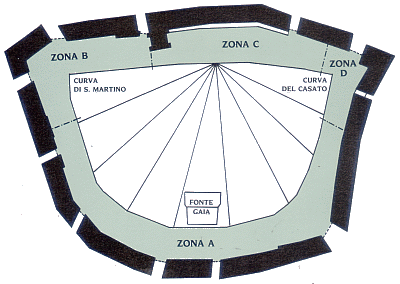

,Cadute
Caduta,
caduto al primo San Martino,170
caduto al primo Casato,130
caduto al secondo San Martino,111
caduto al terzo San Martino,75
caduto al secondo Casato,66
caduto al terzo Casato,35
caduto alla mossa,17
corsa con cavalli scossi,10
caduto,6


In [2]:
from IPython.display import Image, display
display(Image(filename='piazza.gif'))
df2 = pd.DataFrame(columns = ['Cadute'])
df2.Cadute = (df[(df.Caduta != 'nessuna caduta')].groupby('Caduta').count()['DataPalio']).sort_values(axis = 0, ascending = False)
df2

### Palii non corsi in 10

In [74]:
df3 = pd.DataFrame(columns = ['Contrade_in_meno'])
df3.Contrade_in_meno = pd.DataFrame(df[(df.cd_EsitoCorsa == 'NP') | (df.cd_EsitoCorsa == 'NC')]).groupby(['Anno']).count()['DataPalio'].sort_values(axis = 0,ascending = False)
df3.head(20)

,Contrade_in_meno
Anno,
1986,4
2017,2
1982,2
2012,2
2011,1
1968,1
1924,1
1929,1
1939,1


### Numero di Palii non corsi dalle contrade

In [64]:
df3 = pd.DataFrame(columns = ['Mancate_partecipazioni'])
df3.Mancate_partecipazioni = pd.DataFrame(df[(df.cd_EsitoCorsa == 'NP') | (df.cd_EsitoCorsa == 'NC')]).groupby(['Contrada']).count()['DataPalio'].sort_values(axis = 0, ascending = False)
df3

,Mancate_partecipazioni
Contrada,
Giraffa,5
Torre,4
Tartuca,4
Chiocciola,4
Oca,3
Nicchio,3
Civetta,3
Lupa,2
Drago,2


### Contrade vittoriose con cavallo scosso

In [4]:
df2 = pd.DataFrame(columns = ['Vittorie_scosso'])
df2.Vittorie_scosso = (df[(df.Arrivo.apply(int) == 1) & (df.Caduta != 'nessuna caduta')].groupby('Contrada').count()['DataPalio'])
df2

,Vittorie_scosso
Contrada,
Aquila,1
Chiocciola,3
Drago,2
Giraffa,3
Istrice,1
Leocorno,2
Lupa,2
Oca,1
Selva,1


### Numero di vittorie per contrada 

In [5]:
vittorie_contrade = pd.DataFrame(columns = ['Numero_Vittorie'])
vittorie_contrade.Numero_Vittorie = pd.DataFrame(df[(df.Arrivo.apply(int) == 1)]).groupby('Contrada').count()['DataPalio'].sort_values(axis = 0, ascending = False)
vittorie_contrade

,Numero_Vittorie
Contrada,
Oca,23
Giraffa,19
Selva,19
Drago,19
Tartuca,17
Valdimontone,16
Nicchio,16
Chiocciola,14
Lupa,14


### Numero di sorteggi della contrada Valdimontone

In [6]:
sorteggio = pd.DataFrame(df[(df.Contrada == 'Valdimontone') & (df.Sorteggiata == 1)])
partecipazioni = pd.DataFrame(df[(df.Contrada == 'Valdimontone')])
print('Valdimontone è stato estratto', len(sorteggio), 'volte su', len(partecipazioni), 'partecipazioni')

Valdimontone è stato estratto 51 volte su 140 partecipazioni


### Numero di estrazioni per contrada

In [7]:
sorteggi = pd.DataFrame(columns = ['Numero_volte_estratta'])
sorteggi.Numero_volte_estratta = pd.DataFrame(df[df.Sorteggiata == 1]).groupby('Contrada').count()['DataPalio'].sort_values(axis = 0, ascending = True)
sorteggi

,Numero_volte_estratta
Contrada,
Chiocciola,42
Selva,44
Onda,44
Oca,48
Nicchio,49
Valdimontone,51
Civetta,52
Istrice,53
Aquila,55


### Istogramma numero Palii corsi da estratte vs. numero vittorie

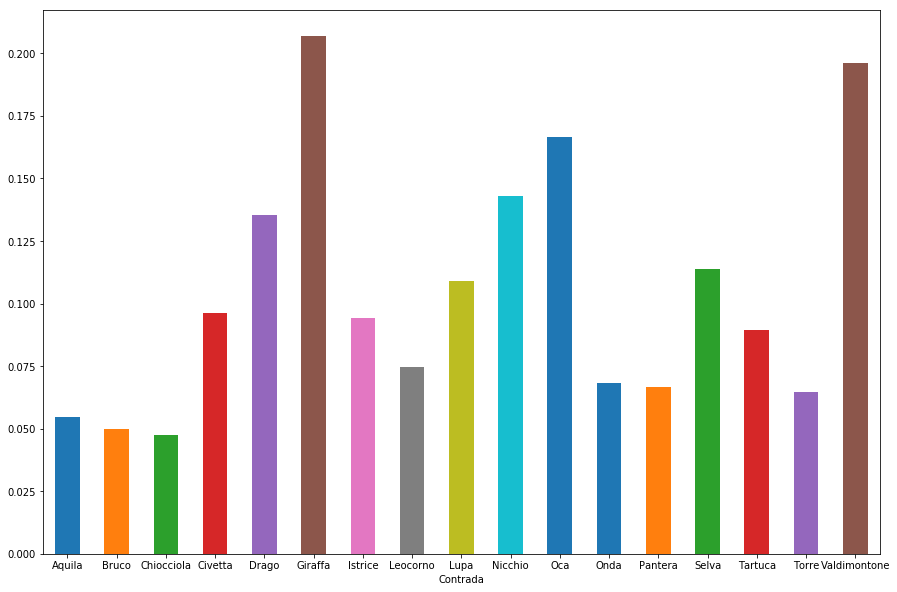

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

estratte_vittoriose = pd.DataFrame(df[(df.Sorteggiata.apply(int) == 1) & (df.Arrivo.apply(int) == 1)]).groupby('Contrada').count()['DataPalio'].sort_values(axis = 0, ascending = True)
vittorie_vs_estrazioni = estratte_vittoriose/sorteggi.Numero_volte_estratta
contrade = pd.concat([estratte_vittoriose, sorteggi.Numero_volte_estratta], axis=1, sort = True)
ax = vittorie_vs_estrazioni.plot.bar(rot = 0, figsize = (15,10))

### Contrade che hanno realizzato almeno un cappotto

In [9]:
cappotti_1 = pd.DataFrame(df[(df.Arrivo == 1) & ((df.Mese == '07') | (df.Mese == '08'))]).groupby(['Anno','Contrada']).count()
cappotti = pd.DataFrame(columns = ['Vittorie_anno'])
cappotti['Vittorie_anno'] = pd.DataFrame(cappotti_1[cappotti_1 > 1]).dropna()['Arrivo']
pd.DataFrame(cappotti)

,,Vittorie_anno
Anno,Contrada,
1933,Tartuca,2.0
1997,Giraffa,2.0
2016,Lupa,2.0


### Palii straordinari 

In [10]:
a = pd.DataFrame(df).groupby(['Anno']).count()
a = a[a >= 30].dropna()
print('Il numero di Palii straordinari dal 1900 ad oggi è',len(a))
print('Anni in cui è stato corso un Palio straordinario')
pd.DataFrame(a.index)

Il numero di Palii straordinari dal 1900 ad oggi è 22
Anni in cui è stato corso un Palio straordinario


,Anno
0,1901
1,1902
2,1904
3,1907
4,1909
5,1910
6,1913
7,1919
8,1928
9,1945


### Numero di vittorie vs. posizione al canape

In [75]:
posizione = pd.DataFrame(columns = ['Vittorie_in_posizione'])
posizione.Vittorie_in_posizione = pd.DataFrame(df[(df.Canape != -1000) & (df.Canape != 0) & (df.Arrivo.apply(int) == 1)]).groupby(['Canape']).count()['DataPalio']
pd.DataFrame(posizione['Vittorie_in_posizione'].astype('int'))

,Vittorie_in_posizione
Canape,
1,31
2,16
3,24
4,37
5,27
6,24
7,16
8,18
9,26


### Palii in cui hanno corso "le quattro verdi" 

In [12]:
import numpy as np
a = df[(df.Contrada == 'Selva') | (df.Contrada == 'Oca') | (df.Contrada == 'Drago') | (df.Contrada == 'Bruco')].groupby('DataPalio').count()
a = a[a == 4].dropna()
quattro_verdi = pd.DataFrame(a).index
print('I Palii corsi con "le quattro verdi" in Campo sono', len(quattro_verdi))
b = pd.DataFrame()
for e in quattro_verdi:
    b = b.append(df[(df.DataPalio == e)])['Anno']
pd.DataFrame(b).index
(pd.DataFrame(df.Anno[pd.DataFrame(b).index]).groupby('Anno').count())

I Palii corsi con "le quattro verdi" in Campo sono 25


C:\Users\Barbara Corradini\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


""
Anno
1910
1912
1919
1925
1934
1936
1937
1938
1939
